<a href="https://colab.research.google.com/github/Divya-Gajjar/Colab_repository/blob/master/Big_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/train_bigmart.csv')
test = pd.read_csv('/content/test_bigdatamart.csv')

In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [0]:
!pip install pandas --upgrade pandas_profiling

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)
     |████████████████████████████████| 194kB 4.5MB/s 
     |████████████████████████████████| 614kB 14.7MB/s 
     |████████████████████████████████| 1.5MB 21.0MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 256kB 35.6MB/s 
     |████████████████████████████████| 307kB 38.6MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 215kB 44.1MB/s 
     |████████████████████████████████| 747kB 36.4MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=cd3c589a90e514d5de646831fd3792dc87f1715c3d054bbbb9959c3f78abb86c
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for c

In [0]:
import pandas_profiling 
pandas_profiling.ProfileReport(df)

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(test)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


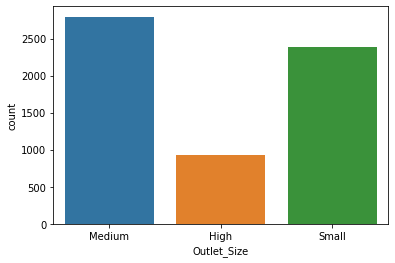

In [0]:
sn.countplot('Outlet_Size',data = df)

In [0]:
df.head()

Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]

In [0]:
pip install category_encoders

     |████████████████████████████████| 102kB 2.4MB/s 


In [0]:
df.describe()

Item_Weight  ...  Item_Outlet_Sales
count  7060.000000  ...        8523.000000
mean     12.857645  ...        2181.288914
std       4.643456  ...        1706.499616
min       4.555000  ...          33.290000
25%       8.773750  ...         834.247400
50%      12.600000  ...        1794.331000
75%      16.850000  ...        3101.296400
max      21.350000  ...       13086.964800

[8 rows x 5 columns]

In [0]:
def preprocessing():
  global df

  df["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg":"Regular"}, inplace=True)

  #removing NA or replace with mean
  print("\n\nbefore preprocessing total numbers of null values\n")
  print(df.isnull().sum())
  #df=df.fillna(df.mean())
  #print("\n\nreplacing null numeric values with mean\n")
  #print(df.isnull().sum())
  print("\n\ndroping non-numeric null values\n")
  df = df.fillna(method='backfill')
  print(df.isnull().sum())

  #one hot encoding
  import category_encoders as ce
  # create an object of the OneHotEncoder
  OHE = ce.OneHotEncoder(cols=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type'],use_cat_names=True)
  # encode the categorical variables
  df = OHE.fit_transform(df)
  
  df['Item_Identifier'] = df['Item_Identifier'].astype(str)
  df['Outlet_Identifier'] = df['Outlet_Identifier'].astype(str)
 

  #label encoding
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()


  df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
  df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])

  df['Item_Outlet_Sales_cbrt'] = np.cbrt(df['Item_Outlet_Sales'])
  df['Item_Visibility_cbrt'] = np.cbrt(df['Item_Visibility'])
 
  return;
preprocessing()



before preprocessing total numbers of null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


droping non-numeric null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [0]:
pip install category_encoders

     |████████████████████████████████| 102kB 2.3MB/s 


In [0]:
def preprocessing():
  global test

  test["Item_Fat_Content"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg":"Regular"}, inplace=True)
  #removing NA or replace with mean
  print("\n\nbefore preprocessing total numbers of null values\n")
  #print(test.isnull().sum())
  #test=test.fillna(test.mean())
  #print("\n\nreplacing null numeric values with mean\n")
  print(test.isnull().sum())
  print("\n\ndroping non-numeric null values\n")
  test = test.fillna(method='backfill')
  print(test.isnull().sum())


  #one hot encoding
  import category_encoders as ce
  # create an object of the OneHotEncoder
  OHE = ce.OneHotEncoder(cols=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type'],use_cat_names=True)
  # encode the categorical variables
  test = OHE.fit_transform(test)
  
  test['Item_Identifier'] = test['Item_Identifier'].astype(str)
  test['Outlet_Identifier'] = test['Outlet_Identifier'].astype(str)

  #label encoding
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()

  test['Item_Identifier'] = le.fit_transform(test['Item_Identifier'])
  test['Outlet_Identifier'] = le.fit_transform(test['Outlet_Identifier'])


  test['Item_Visibility_cbrt'] = np.cbrt(test['Item_Visibility'])

  return;
preprocessing()



before preprocessing total numbers of null values

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


droping non-numeric null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  3
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


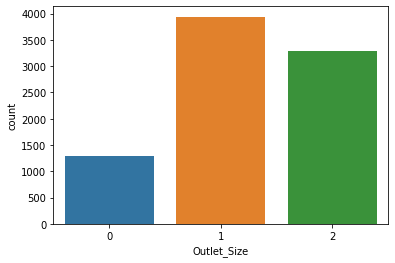

In [0]:
sn.countplot('Outlet_Size',data = df)

In [0]:
df.head()

Item_Identifier  ...  Item_Outlet_Sales
0              156  ...          3735.1380
1                8  ...           443.4228
2              662  ...          2097.2700
3             1121  ...           732.3800
4             1297  ...           994.7052

[5 rows x 20 columns]

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


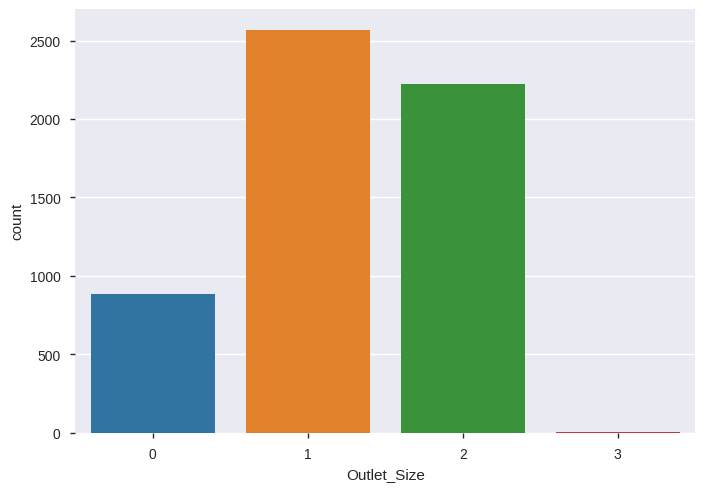

In [0]:
sn.countplot("Outlet_Size",data = test)

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4075 entries, 0 to 5677
Data columns (total 11 columns):
Item_Identifier              4075 non-null int64
Item_Weight                  4075 non-null float64
Item_Fat_Content             4075 non-null int64
Item_Visibility              4075 non-null float64
Item_Type                    4075 non-null int64
Item_MRP                     4075 non-null float64
Outlet_Identifier            4075 non-null int64
Outlet_Establishment_Year    4075 non-null int64
Outlet_Size                  4075 non-null int64
Outlet_Location_Type         4075 non-null int64
Outlet_Type                  4075 non-null int64
dtypes: float64(3), int64(8)
memory usage: 382.0 KB


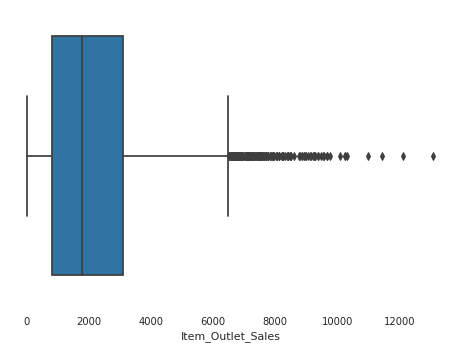

In [0]:
sn.boxplot(x=df['Item_Outlet_Sales'])

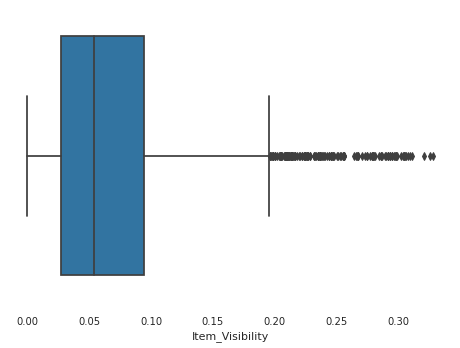

In [0]:
sn.boxplot(x=df['Item_Visibility'])

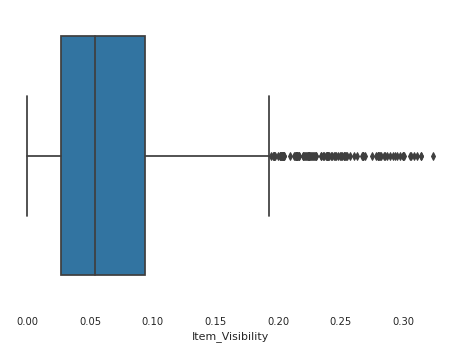

In [0]:
sn.boxplot(x=test['Item_Visibility'])

(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

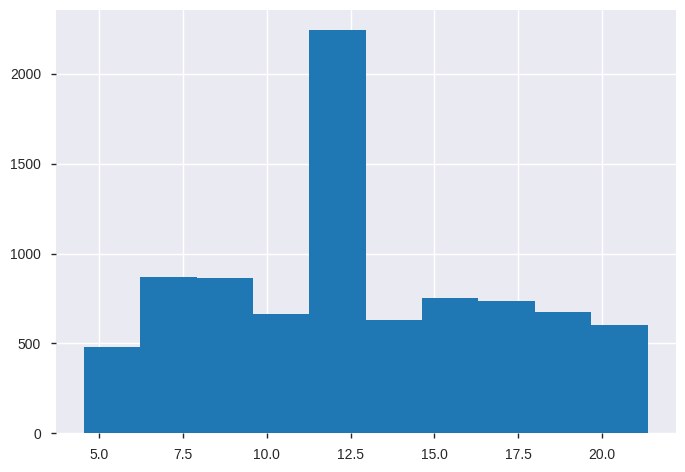

In [0]:
plt.hist('Item_Weight',data=df)

(array([2639., 2329., 1563.,  979.,  593.,  279.,   60.,   35.,   29.,
          17.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <a list of 10 Patch objects>)

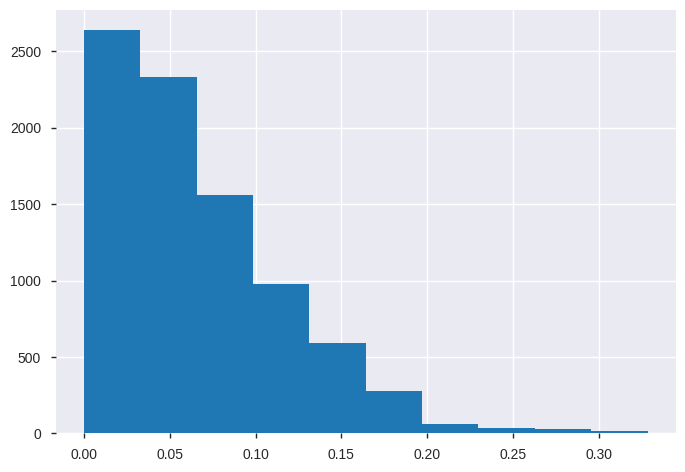

In [0]:
plt.hist('Item_Visibility',data = df)

(array([653., 406., 769., 888., 577., 783., 871., 338., 411., 417.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <a list of 10 Patch objects>)

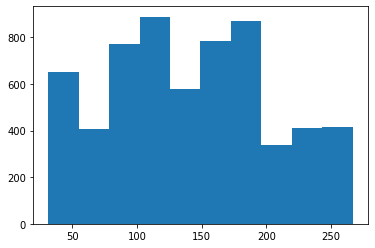

In [0]:
plt.hist('Item_MRP',data = df)

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

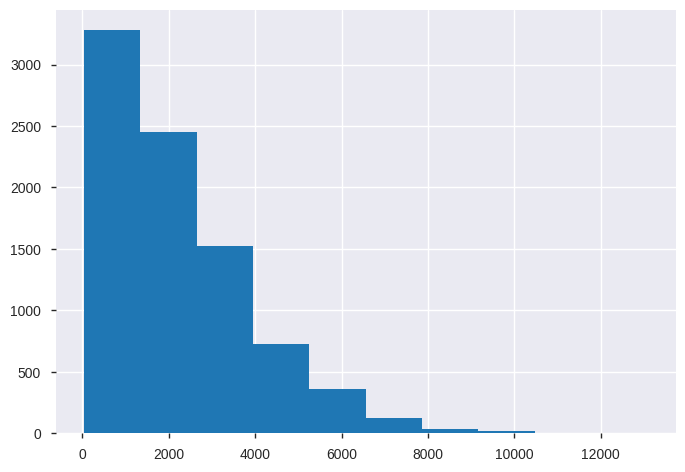

In [0]:
plt.hist('Item_Outlet_Sales',data = df)

ERROR! Session/line number was not unique in database. History logging moved to new session 62


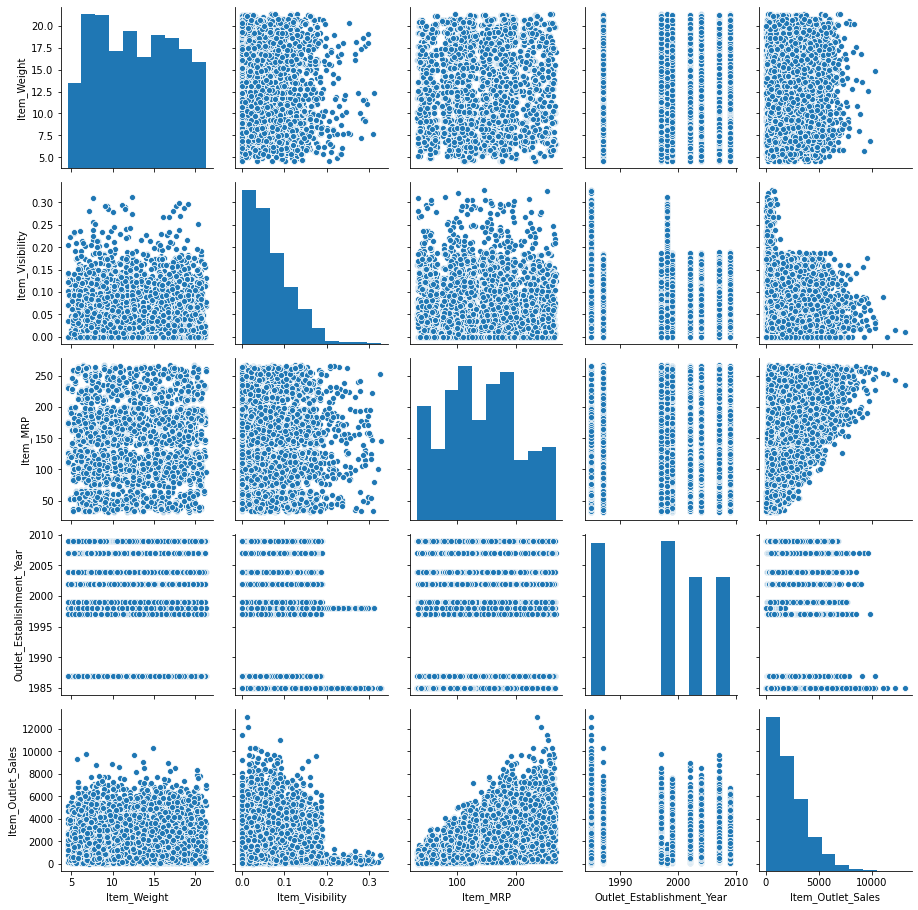

In [0]:
sn.pairplot(df)

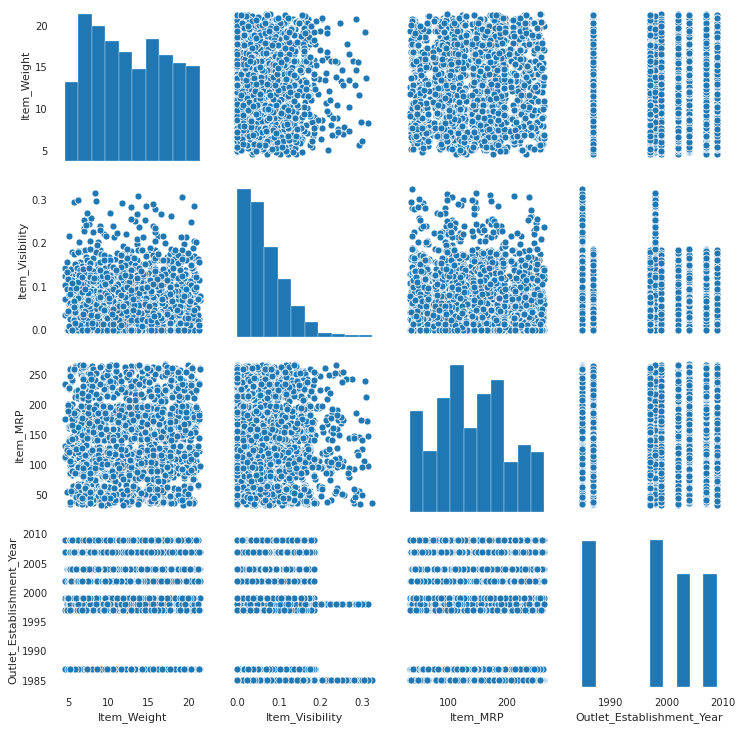

In [0]:
sn.pairplot(test)

(array([2268., 2300., 1577., 1046.,  724.,  423.,   88.,   46.,   27.,
          24.]),
 array([0.        , 0.02839684, 0.05679368, 0.08519052, 0.11358736,
        0.1419842 , 0.17038104, 0.19877788, 0.22717472, 0.25557156,
        0.2839684 ]),
 <a list of 10 Patch objects>)

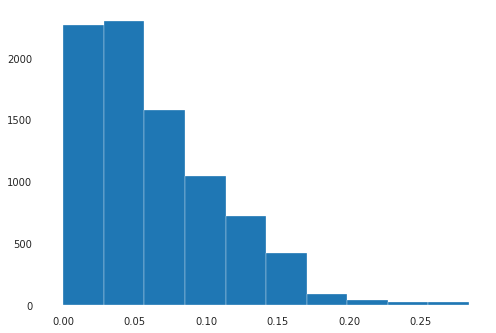

In [0]:
plt.hist(df['Item_Visibility_log'])

(array([ 526.,  410., 1381., 1859., 1720., 1235.,  910.,  366.,   71.,
          45.]),
 array([0.        , 0.05730541, 0.11461081, 0.17191622, 0.22922162,
        0.28652703, 0.34383243, 0.40113784, 0.45844324, 0.51574865,
        0.57305405]),
 <a list of 10 Patch objects>)

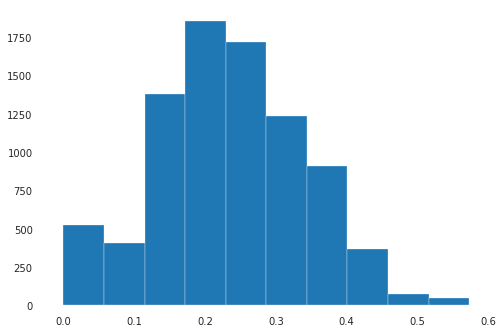

In [0]:
plt.hist(np.sqrt(df['Item_Visibility']))

(array([ 526.,    0.,  152.,  891., 1757., 1918., 1731., 1165.,  316.,
          67.]),
 array([0.        , 0.06899173, 0.13798347, 0.2069752 , 0.27596694,
        0.34495867, 0.4139504 , 0.48294214, 0.55193387, 0.6209256 ,
        0.68991734]),
 <a list of 10 Patch objects>)

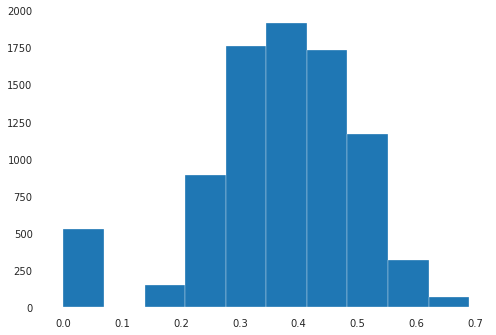

In [0]:
plt.hist(np.cbrt(df['Item_Visibility']))

(array([ 674., 1249., 1639., 1820., 1582.,  950.,  447.,  131.,   27.,
           4.]), array([  5.76974869,  16.6326011 ,  27.4954535 ,  38.3583059 ,
         49.2211583 ,  60.0840107 ,  70.94686311,  81.80971551,
         92.67256791, 103.53542031, 114.39827271]), <a list of 10 Patch objects>)

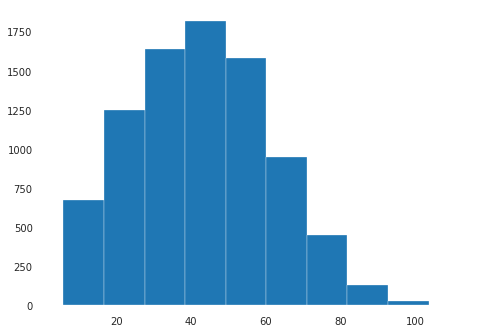

In [0]:
plt.hist(np.sqrt(df['Item_Outlet_Sales']))

(array([ 255.,  721., 1106., 1464., 1796., 1673., 1001.,  424.,   75.,
           8.]),
 array([ 3.21690275,  5.25177868,  7.2866546 ,  9.32153053, 11.35640646,
        13.39128239, 15.42615831, 17.46103424, 19.49591017, 21.5307861 ,
        23.56566202]),
 <a list of 10 Patch objects>)

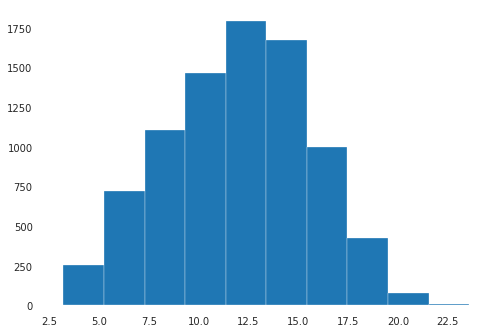

In [0]:
plt.hist(np.cbrt(df['Item_Outlet_Sales']))

(array([  53.,   99.,  326.,  429.,  784., 1251., 2051., 2276., 1156.,
          98.]),
 array([3.50525705, 4.10266854, 4.70008003, 5.29749152, 5.89490302,
        6.49231451, 7.089726  , 7.68713749, 8.28454898, 8.88196047,
        9.47937196]),
 <a list of 10 Patch objects>)

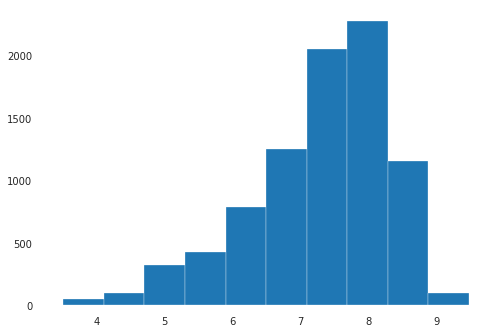

In [0]:
plt.hist(df['Item_Outlet_Sales_log'])

In [0]:
from sklearn.feature_selection import RFE
selector = RFE(rand_r, 5)
selector = selector.fit(x,y)
l1 = selector.ranking_
l2 = x.columns
for i in zip(l1,l2):
  print(i)

(1, 'Item_Identifier')
(2, 'Item_Weight')
(5, 'Item_Fat_Content')
(1, 'Item_Visibility')
(3, 'Item_Type')
(1, 'Item_MRP')
(4, 'Outlet_Identifier')
(1, 'Outlet_Establishment_Year')
(6, 'Outlet_Size')
(7, 'Outlet_Location_Type')
(1, 'Outlet_Type')


In [0]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Visibility', 'Item_Type_Dairy',
       'Item_Type_Soft Drinks', 'Item_Type_Meat',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Household',
       'Item_Type_Baking Goods', 'Item_Type_Snack Foods',
       'Item_Type_Frozen Foods', 'Item_Type_Breakfast',
       'Item_Type_Health and Hygiene', 'Item_Type_Hard Drinks',
       'Item_Type_Canned', 'Item_Type_Breads', 'Item_Type_Starchy Foods',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size_Medium',
       'Outlet_Size_High', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 3', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3',
       'Item_Outlet_Sales', 'Item_Outlet_Sales_cbrt', 'Item_Vi

In [0]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [0]:
x = df[[ 'Item_Weight', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Visibility_cbrt', 'Item_Type_Dairy',
       'Item_Type_Soft Drinks', 'Item_Type_Meat',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Household',
       'Item_Type_Baking Goods', 'Item_Type_Snack Foods',
       'Item_Type_Frozen Foods', 'Item_Type_Breakfast',
       'Item_Type_Health and Hygiene', 'Item_Type_Hard Drinks',
       'Item_Type_Canned', 'Item_Type_Breads', 'Item_Type_Starchy Foods',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size_Medium',
       'Outlet_Size_High', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 3', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3']]
y = df[['Item_Outlet_Sales_cbrt']]
test_pred = test[[ 'Item_Weight', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Visibility_cbrt', 'Item_Type_Dairy',
       'Item_Type_Soft Drinks', 'Item_Type_Meat',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Household',
       'Item_Type_Baking Goods', 'Item_Type_Snack Foods',
       'Item_Type_Frozen Foods', 'Item_Type_Breakfast',
       'Item_Type_Health and Hygiene', 'Item_Type_Hard Drinks',
       'Item_Type_Canned', 'Item_Type_Breads', 'Item_Type_Starchy Foods',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size_Medium',
       'Outlet_Size_High', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 3', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3']]

In [0]:
x = df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
y = df[['Item_Outlet_Sales']]
  
from sklearn.ensemble import RandomForestRegressor
eng_model = RandomForestRegressor().fit(x,y)
from sklearn.feature_selection import RFE
selector = RFE(eng_model, 10, step=1)
selector = selector.fit(x,y)
l1 = selector.ranking_
l2 = x.columns
for i in zip(l1,l2):
  print(i)

ValueError: ignored

In [0]:
def Linear_reg():

  global LR_model, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)

  from sklearn.linear_model import LinearRegression
  LR_model = LinearRegression().fit(xtrain, ytrain)

  print('\n\n*****Linear Regression*****\n')
  print("train score",LR_model.score(xtrain, ytrain),'\n')
  print("test score",LR_model.score(xtest, ytest),'\n')

  y_pred = LR_model.predict(xtest)

  from sklearn.metrics import mean_squared_error, r2_score
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)  
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(LR_model,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;


def decision_reg():

  global dec_r, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
  from sklearn.tree import DecisionTreeRegressor
  dec_r = DecisionTreeRegressor().fit(xtrain, ytrain)

  print('\n\n*****Decision tree Regression*****\n')
  print("train score",dec_r.score(xtrain, ytrain),'\n')
  print("test score",dec_r.score(xtest, ytest),'\n')

  y_pred = dec_r.predict(xtest)

  from sklearn.metrics import mean_squared_error, r2_score
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)  
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(dec_r,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;



def randomf_reg():

  global rand_r, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
  
  from sklearn.ensemble import RandomForestRegressor
  rand_r = RandomForestRegressor().fit(xtrain,ytrain)

  print('\n\n*****Random forest Regression*****\n')
  print("train score",rand_r.score(xtrain, ytrain))
  print("test score",rand_r.score(xtest, ytest),'\n')


  from sklearn.metrics import mean_squared_error, r2_score
  y_pred = rand_r.predict(xtest)
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)  
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(rand_r,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;


def GB_regression():

  global gb_reg, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,shuffle=True)

  from sklearn.ensemble import GradientBoostingRegressor
  gb_reg = GradientBoostingRegressor().fit(xtrain, ytrain)
  print('\n\n*****GradientBoosting Regressor*****\n')
  print("train score",gb_reg.score(xtrain, ytrain))
  print("test score",gb_reg.score(xtest, ytest),'\n')


  from sklearn.metrics import mean_squared_error, r2_score
  y_pred = gb_reg.predict(xtest)
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)  
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(gb_reg,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;

def voting_regression():

  global V_reg, xtrain, xtest, ytrain, ytest
  from sklearn.model_selection import train_test_split
  xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,shuffle=True)
  from sklearn.linear_model import LinearRegression
  from sklearn.ensemble import VotingRegressor, RandomForestRegressor



  V_reg = VotingRegressor([('lr', rand_r), ('x',gb_reg)]).fit(x,y)
  print('\n\n*****Votting Regressor*****\n')
  print("train score",V_reg.score(xtrain, ytrain))
  print("test score",V_reg.score(xtest, ytest),'\n')


  from sklearn.metrics import mean_squared_error, r2_score
  y_pred = V_reg.predict(xtest)
  mse = mean_squared_error(ytest, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(ytest, y_pred)
  # printing values
  print('Root mean squared error: ', rmse)
  print('R2 score: ', r2)

  '''from sklearn.model_selection import cross_val_score
  cv = cross_val_score(gb_reg,x,y,cv=10)
  print('\nCross validation of Random Forest:  ',cv.mean())'''

  return;


In [0]:
voting_regression()



*****Votting Regressor*****

train score 0.8628303234019484
test score 0.8673500215540872 

Root mean squared error:  1.293890146196283
R2 score:  0.8673500215540872


In [0]:
VR_pred = V_reg.predict(test_pred)


In [0]:
VR_pred = np.power(VR_pred,3)

In [0]:
pd.DataFrame(VR_pred).to_csv("VR_RF_GB_prediction_cbrt.csv")

In [0]:
Linear_reg()
decision_reg()
randomf_reg()
GB_regression()
voting_regression()



*****Linear Regression*****

train score 0.6805378503957293 

test score 0.6895789851937193 

Root mean squared error:  1.9999388086418242
R2 score:  0.6895789851937193


*****Decision tree Regression*****

train score 1.0 

test score 0.3710329304465745 

Root mean squared error:  2.791221474792598
R2 score:  0.3710329304465745


*****Random forest Regression*****

train score 0.9523336453201819
test score 0.6732671138886038 

Root mean squared error:  2.070595620246956
R2 score:  0.6732671138886038


*****GradientBoosting Regressor*****

train score 0.7226493718809303
test score 0.7005045407633709 

Root mean squared error:  1.9685989171248808
R2 score:  0.7005045407633709


*****Votting Regressor*****

train score 0.8617693994527572
test score 0.8679069744778486 

Root mean squared error:  1.2998250871819264
R2 score:  0.8679069744778486


In [0]:
xgb_pred = np.power(xgb_pred,3)

In [0]:
test_x = xgb.DMatrix(test_pred)
xgb_pred = xgb_model.predict(test_x)
print(xgb_pred)

[11.40412   10.622825   7.8869944 ... 11.862331  15.740388  11.184617 ]


In [0]:
xgb_pred = np.power(xgb_pred,3)
print('linear')
print(xgb_pred.min())
print(xgb_pred.mean())
print(xgb_pred.max())

linear
42.548664
2029.3167
7133.2646


In [0]:
pd.DataFrame(xgb_pred).to_csv("xgb_prediction_cbrt.csv")

In [0]:
Linear_reg()
decision_reg()
randomf_reg()
GB_regression()
voting_regression()



*****Linear Regression*****

train score 0.6790531063114615 

test score 0.6924990475081205 

Root mean squared error:  1.9862472279874857
R2 score:  0.6924990475081205


*****Decision tree Regression*****

train score 1.0 

test score 0.37266648324555207 

Root mean squared error:  2.822946535640014
R2 score:  0.37266648324555207


*****Random forest Regression*****

train score 0.9524777749440282
test score 0.6633535346148416 

Root mean squared error:  2.075925952349024
R2 score:  0.6633535346148416


*****GradientBoosting Regressor*****

train score 0.7214859883632858
test score 0.7025887662831081 

Root mean squared error:  1.9468617378659763
R2 score:  0.7025887662831081


*****Votting Regressor*****

train score 0.8488724695352766
test score 0.8440254034148145 

Root mean squared error:  1.4082618426466016
R2 score:  0.8440254034148145


In [0]:
Linear_reg()
decision_reg()
randomf_reg()
GB_regression()
voting_regression()



*****Linear Regression*****

train score 0.7184509145457446 

test score 0.7235855359527533 

Root mean squared error:  0.2784289052314083
R2 score:  0.7235855359527533


*****Decision tree Regression*****

train score 0.99999999996581 

test score 0.45282844722545645 

Root mean squared error:  0.5790043157834603
R2 score:  0.45282844722545645


*****Random forest Regression*****

train score 0.9597140536595615
test score 0.7008685003327257 

Root mean squared error:  0.2961570839076839
R2 score:  0.7008685003327257


*****GradientBoosting Regressor*****

train score 0.7651545666362114
test score 0.7275492393169194 

Root mean squared error:  0.2786207359250817
R2 score:  0.7275492393169194


*****Votting Regressor*****

train score 0.8667517704640488
test score 0.87148654109744 

Root mean squared error:  0.13549616555382935
R2 score:  0.87148654109744


In [0]:
Linear_reg()
decision_reg()
randomf_reg()
GB_regression()
voting_regression()



*****Linear Regression*****

train score 0.739815866278627 

test score 0.7435590434998927 

Root mean squared error:  0.27561392294833414
R2 score:  0.7435590434998927


*****Decision tree Regression*****

train score 0.9999999999826691 

test score 0.4669247516135415 

Root mean squared error:  0.5470742019389663
R2 score:  0.4669247516135415


*****Random forest Regression*****

train score 0.960048433694255
test score 0.6965863168282309 

Root mean squared error:  0.3049559522161368
R2 score:  0.6965863168282309


*****GradientBoosting Regressor*****

train score 0.7586098637610165
test score 0.7451563592132727 

Root mean squared error:  0.2690146785635521
R2 score:  0.7451563592132727


*****Votting Regressor*****

train score 0.8719645221681959
test score 0.8742917835409417 

Root mean squared error:  0.13158237649400453
R2 score:  0.8742917835409417


In [0]:
LR_pred = np.power(LR_model.predict(test_pred),3)
dec_pred = np.power(dec_r.predict(test_pred),3)
rand_pred = np.power(rand_r.predict(test_pred),3)
gb_pred = np.power(gb_reg.predict(test_pred),3)
vr_pred = np.power(V_reg.predict(test_pred),3)


In [0]:
print('linear')
print(LR_pred.min())
print(LR_pred.mean())
print(LR_pred.max())

print('decision')
print(dec_pred.min())
print(dec_pred.mean())
print(dec_pred.max())
print('random')

print(rand_pred.min())
print(rand_pred.mean())
print(rand_pred.max())
print('gb')

print(gb_pred.min())
print(gb_pred.mean())
print(gb_pred.max())
print('vr')

print(vr_pred.min())
print(vr_pred.mean())
print(vr_pred.max())

linear
26.53873608187634
2015.602694518773
6744.868477024384
decision
33.29000000000001
2210.0660833303996
13086.964800000002
random
43.71419650397864
2052.5960092065416
7989.500564524595
gb
34.809874185805135
2031.2978036657573
6435.539879473898
vr
35.12277347932286
2034.8898654130005
7101.112490243953


In [0]:
pd.DataFrame(LR_pred).to_csv("log_LR_prediction_cbrt.csv")
pd.DataFrame(dec_pred).to_csv("log_DC_prediction_cbrt.csv")
pd.DataFrame(rand_pred).to_csv("log_RF_prediction_cbrt.csv")
pd.DataFrame(gb_pred).to_csv("log_GB_prediction_cbrt.csv")
pd.DataFrame(vr_pred).to_csv("log_vr_prediction_cbrt.csv")

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, shuffle = True)
from sklearn.neighbors import KNeighborsRegressor
# measuring RMSE score
from sklearn.metrics import mean_squared_error

# knn 
knn = KNeighborsRegressor(n_neighbors=7).fit(xtrain,ytrain)
print("train score",knn.score(xtrain, ytrain))
print("test score",knn.score(xtest, ytest),'\n')
from sklearn.metrics import mean_squared_error, r2_score
y_pred = knn.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, y_pred)
# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

train score 0.4239023949838423
test score 0.24429649787817853 

Root mean squared error:  3.1414318073828778
R2 score:  0.24429649787817853


RMSE for xgboost: 2.03


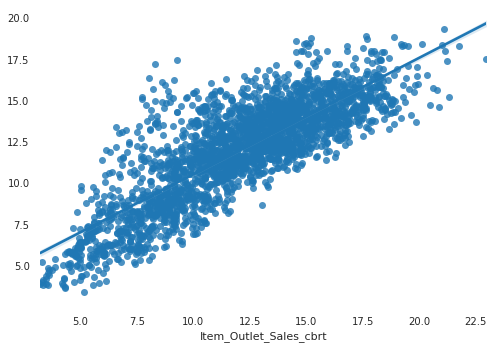

In [0]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error, r2_score
import math
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}
plst = params.items()
dtrain = xgb.DMatrix(xtrain, ytrain)
dtest = xgb.DMatrix(xtest)
num_rounds = 500
xgb_model = xgb.train(plst, dtrain, num_rounds)
yt_xgb = xgb_model.predict(dtest)
mse = mean_squared_error(ytest, yt_xgb)
rmse_xgb = np.sqrt(mse)
sn.regplot(ytest, yt_xgb)
print("RMSE for xgboost: %.2f" % rmse_xgb)